<a href="https://colab.research.google.com/github/xFlodz/image_processing/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%961%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B8%20%D0%B4%D0%B5%D1%82%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%20%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2%20%D0%BD%D0%B0%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8%20%D1%81%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC%20%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8%20ImageAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проектная работа №1. Классификация и детекция объектов на изображении с использованием библиотеки ImageAI

Ссылка на страницу с технической документацией: https://imageai.readthedocs.io/en/latest/index.html

- *ImageAI — это Python-библиотека, созданная для того, чтобы дать разработчикам, исследователям и студентам возможность создавать приложения и системы с автономными возможностями глубокого обучения и компьютерного зрения с использованием простого и небольшого количества строк кода.*

**Перечень объектов, которые идентифицирует ImageAI:**

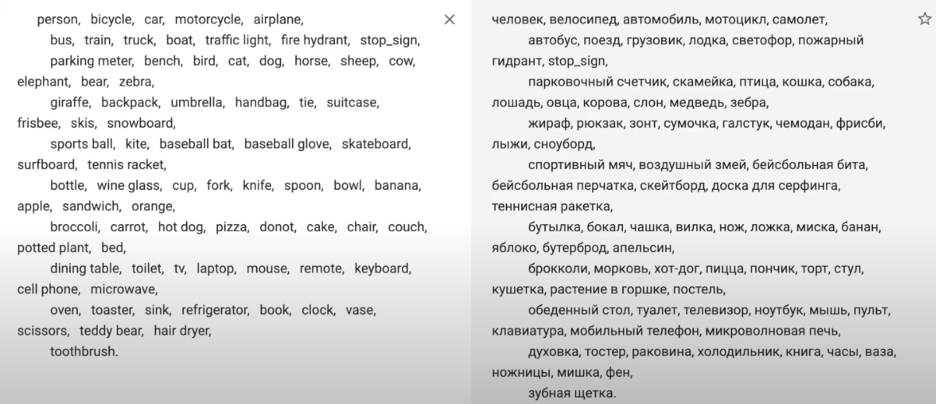

# **Примеры работы с библиотекой:**

In [ ]:
!pip install imageai # установка библиотеки ImageAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 2.8 MB/s eta 0:00:00


# Добавляем в проект исходное изображение:

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
req = urlopen('https://img.youscreen.ru/wall/14977257054998/14977257054998_1920x1200.jpg') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

cv2_imshow(image_2) # Выводим изображение, используя метод cv2_imshow()

# Пример №1. Детекция

[Техническая документация](https://imageai.readthedocs.io/en/latest/detection/index.html)

In [ ]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsRetinaNet() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/retinanet.pth") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects.jpg")
cv2_imshow(output_image)

ModuleNotFoundError: No module named 'imageai'

# Пример №2. Классификация

[Техническая документация](https://imageai.readthedocs.io/en/latest/prediction/index.html)

In [ ]:
from imageai.Classification import ImageClassification
import os

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [ ]:
execution_path = "/content/drive/MyDrive/resnet50.pth"

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath(execution_path)
prediction.loadModel()

In [ ]:
predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

NameError: name 'prediction' is not defined

# Задание №1. Детекция объектов на изображении

1.1. Перейдите по ссылке из примера №1

1.2. Загрузите готовую модель для детекции объектов на изображении, отличную от той, что представлена в примере

1.3. Используя данную модель, обработе 5 изображений с больши набором объектов, которые относятся к разным классам

1.4. Визуализируйте полученные результаты

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsYOLOv3() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/yolov3.pt") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/drive/MyDrive/new_file/1.jpg"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects.jpg")
cv2_imshow(output_image)

In [ ]:
list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/drive/MyDrive/new_file/2.jpg"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects2.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects2.jpg")
cv2_imshow(output_image)

In [ ]:
list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/drive/MyDrive/new_file/3.png"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects3.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects3.jpg")
cv2_imshow(output_image)

In [ ]:
list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/drive/MyDrive/new_file/4.jpg"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects4.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects4.jpg")
cv2_imshow(output_image)

In [ ]:
list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/drive/MyDrive/new_file/5.png"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects5.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects5.jpg")
cv2_imshow(output_image)

# Задание №2. Классификация изображений

2.1. Перейдите по ссылке из примера №2

2.2. Загрузите готовую модель для классификации изображений, отличную от той, что представлена в примере

2.3. Используя данную модель, обработе 5 изображений, которые относятся к разным классам

2.4. Сохраните полученные предсказания используемой модели

In [ ]:
from imageai.Classification import ImageClassification
import os


execution_path = "/content/drive/MyDrive/inception_v3_google-1a9a5a14.pth"

prediction = ImageClassification()
prediction.setModelTypeAsInceptionV3()
prediction.setModelPath(execution_path)
prediction.loadModel()


predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
cv2_imshow(image_2)


predictions, probabilities = prediction.classifyImage((cv2.imread("/content/drive/MyDrive/new_file/1.jpg")), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
cv2_imshow(cv2.imread("/content/drive/MyDrive/new_file/1.jpg"))

predictions, probabilities = prediction.classifyImage((cv2.imread("/content/drive/MyDrive/new_file/2.jpg")), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
cv2_imshow(cv2.imread("/content/drive/MyDrive/new_file/2.jpg"))

predictions, probabilities = prediction.classifyImage((cv2.imread("/content/drive/MyDrive/new_file/3.png")), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
cv2_imshow(cv2.imread("/content/drive/MyDrive/new_file/3.png"))

predictions, probabilities = prediction.classifyImage((cv2.imread("/content/drive/MyDrive/new_file/4.jpg")), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
cv2_imshow(cv2.imread("/content/drive/MyDrive/new_file/4.jpg"))

# Задание №3. Детекция и трекинг объектов на видеопотоке

## 3.1. Подготовка набора данных:

* Найдите и загрузите из сети Интернет 5 видеофайлов с большим количеством разнородных объектов в кадре (например запись с камеры видеонаблюдения на шоссе и тд) длительностью от 30 секунд до 1 минуты (Также Вы можете скачать видеофайл большей длительности, а затем обрезать его в одном из [онлйан-сервисов](https://online-video-cutter.com/ru/?ysclid=lfjb8zk8er484677266).


* Для более оптимальной работы с видеофайлами, сожмите их, используя онлайн-сервисы. ([Например тут](https://compress-video-online.com/ru/ ))

## 3.2. Детекция и трекинг объектов на видеопотоке

3.2.1. [Ознакомьтесь с технической документацией](https://imageai.readthedocs.io/en/latest/video/index.html)

3.2.2. Загрузите готовую модель для детекции объектов

3.2.3. Используя данную модель, обработайте 5 видеофайлов (см. п. 3.1.)

3.2.4. Сохраните полученные видеофайлы

In [ ]:
from imageai.Detection import VideoObjectDetection

detector = VideoObjectDetection()

execution_path = os.getcwd()

detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/MyDrive/yolov3.pt")
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "/content/drive/MyDrive/trafic.mp4"),
                            output_file_path=os.path.join(execution_path, "traffic_detected")
                            , frames_per_second=20, log_progress=True)

print(video_path)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

# Задание №4. Работа с видеопотоком вебкамеры

## 4.1. Ознакомиться с примерами создания фото и видео в среде Google Colab:



### **Устаналиваем зависимости:**

In [ ]:
# Импортируем необходимые библиотеки
import cv2  # OpenCV для обработки изображений
from google.colab import output  # Для взаимодействия с выводом в Google Colab
from google.colab.patches import cv2_imshow  # Специальная функция для отображения изображений в Colab
from IPython.display import display, Javascript  # Для выполнения JavaScript в ячейках Jupyter
from base64 import b64decode  # Для декодирования данных из base64
import numpy as np  # Для работы с массивами
import time  # Для работы со временем

### **Функция для создания фото:**

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    """
    Захватывает фотографию с веб-камеры пользователя и сохраняет ее в файл.

    Эта функция использует JavaScript для доступа к веб-камере через браузер,
    отображает видеопоток и позволяет пользователю сделать снимок, нажав кнопку "Capture".

    Параметры:
    filename (str): Имя файла для сохранения фотографии. По умолчанию 'photo.jpg'.
    quality (float): Качество сжатия JPEG от 0 до 1. По умолчанию 0.8.

    Возвращает:
    str: Имя файла, в который была сохранена фотография.

    Примечания:
    - Функция требует разрешения пользователя на доступ к веб-камере.
    - Работает только в среде, поддерживающей выполнение JavaScript (например, Google Colab).
    - Изображение сначала кодируется в формат base64, а затем декодируется и сохраняется как файл.
    """
    # Создаем JavaScript-код для захвата фото с веб-камеры
    js = Javascript('''
        async function takePhoto() {
            // Создаем элементы интерфейса
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';

            // Получаем доступ к веб-камере
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Изменяем размер вывода, чтобы вместить видео
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Ждем, пока пользователь нажмет кнопку "Capture"
            await new Promise((resolve) => capture.onclick = resolve);

            // Создаем canvas и захватываем кадр с видео
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            // Останавливаем видеопоток и удаляем элементы интерфейса
            stream.getVideoTracks()[0].stop();
            div.remove();

            // Возвращаем изображение в формате base64
            return canvas.toDataURL('image/jpeg', %f);
        }
        ''' % quality)

    # Отображаем JavaScript-код
    display(js)

    # Выполняем функцию takePhoto() и получаем результат
    data = output.eval_js('takePhoto()')

    # Декодируем данные из base64
    binary = b64decode(data.split(',')[1])

    # Сохраняем изображение в файл
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

### **Функция для создания видео:**

In [ ]:
def record_video(filename='video.mp4', duration=5):
    """
    Записывает видео с веб-камеры пользователя и сохраняет его в файл.

    Эта функция использует JavaScript для доступа к веб-камере через браузер,
    записывает видео указанной продолжительности и сохраняет его в формате MP4.

    Параметры:
    filename (str): Имя файла для сохранения видео. По умолчанию 'video.mp4'.
    duration (int): Продолжительность записи в секундах. По умолчанию 5 секунд.

    Возвращает:
    str: Имя файла, в который было сохранено видео.

    Примечания:
    - Функция требует разрешения пользователя на доступ к веб-камере.
    - Работает только в среде, поддерживающей выполнение JavaScript (например, Google Colab).
    - Видео сначала кодируется в формат base64, а затем декодируется и сохраняется как файл MP4.
    - Запись начинается автоматически и заканчивается после указанной продолжительности.
    """
    # Создаем JavaScript-код для записи видео с веб-камеры
    js = Javascript('''
        async function recordVideo(duration) {
            // Создаем элемент видео
            const video = document.createElement('video');
            video.style.display = 'block';

            // Получаем доступ к веб-камере
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Изменяем размер вывода, чтобы вместить видео
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Создаем объект MediaRecorder для записи видео
            const recorder = new MediaRecorder(stream);
            const chunks = [];
            recorder.ondataavailable = e => chunks.push(e.data);
            recorder.start();

            // Ждем указанную продолжительность
            await new Promise(resolve => setTimeout(resolve, duration * 1000));

            // Останавливаем запись и видеопоток
            recorder.stop();
            stream.getVideoTracks()[0].stop();
            video.remove();

            // Возвращаем записанное видео в формате base64
            return new Promise(resolve => {
                recorder.onstop = () => {
                    const blob = new Blob(chunks, {type: 'video/mp4'});
                    const reader = new FileReader();
                    reader.onload = e => resolve(e.target.result);
                    reader.readAsDataURL(blob);
                };
            });
        }
    ''')

    # Отображаем JavaScript-код
    display(js)

    # Выполняем функцию recordVideo() и получаем результат
    data = output.eval_js(f'recordVideo({duration})')

    # Декодируем данные из base64
    binary = b64decode(data.split(',')[1])

    # Сохраняем видео в файл
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

### **Пример работы:**

In [ ]:
# Сделать фото
photo_filename = take_photo()

# Записать видео длительностью 10 секунд
video_filename = record_video(duration=10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4.2. Детекция и трекинг объектов на видеопотоке с вебкамеры


### 4.2.1. Используйте take_photo() для получения снимка и record_video() для создания 15-секундного видео с веб-камеры


### 4.2.2. Загрузите модель трекинга и детекции объектов


### 4.2.3. Реализуйте функции для обработки полученных фото и видео с помощью модели трекинга:
- Для фото: сохраните результат как "tracked_photo.jpg".
- Для видео: создайте новое видео с отмеченными объектами - "tracked_video.mp4".

In [ ]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsYOLOv3() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/yolov3.pt") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=cv2.imread("/content/photo.jpg"), # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=52, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

print(list)
output_image = cv2.imread("/content/new_objects.jpg")
cv2_imshow(output_image)

In [ ]:
from imageai.Detection import VideoObjectDetection

detector = VideoObjectDetection()

execution_path = os.getcwd()

detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/MyDrive/yolov3.pt")
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "/content/video.mp4"),
                            output_file_path=os.path.join(execution_path, "new_video")
                            , frames_per_second=20, log_progress=True)

print(video_path)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  